<a href="https://colab.research.google.com/github/qinhuuuuu/MachineLearning/blob/main/Lab_5_20130356_PhanThiQuynhNhu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# This lab is to deal with **SVM** to classification tasks and compare its performance with other competitive algorithms. In general, **SVM** is one of the most popular and widely used supervised machine learning algorithms.

*   **Deadline: 23:59, 17/03/2023**



# Import libraries

In [1]:
# code

from google.colab import drive
drive.mount('/content/gdrive')
%cd '/content/gdrive/MyDrive/machineLearning'


Mounted at /content/gdrive
/content/gdrive/MyDrive/machineLearning


In [41]:
from sklearn import datasets
from sklearn import svm
from sklearn.model_selection import train_test_split as tts
from sklearn import metrics as m
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression 
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
from sklearn.preprocessing import StandardScaler


#Task 1. 
For breast cancer dataset (https://tinyurl.com/3vme8hr3) which could be loaded from datasets in sklearn as follows:

```
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
cancer = datasets.load_breast_cancer()
```

*   1.1.	Apply SVM algorithm to above dataset using linear kernel.
*   1.2.	Compare the obtained results with other competitive algorithms (Logistic Regression, Decision Tree, kNN) based on metrics: accuracy, precision, recall, f1 measures.



[1 1 0 1 0 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 0 0
 1 0 1 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 1
 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 0
 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1]
[[ 57   7]
 [  2 105]]
              precision    recall  f1-score   support

           0       0.97      0.89      0.93        64
           1       0.94      0.98      0.96       107

    accuracy                           0.95       171
   macro avg       0.95      0.94      0.94       171
weighted avg       0.95      0.95      0.95       171

Confusion display:  <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7fd1dfa70b50>


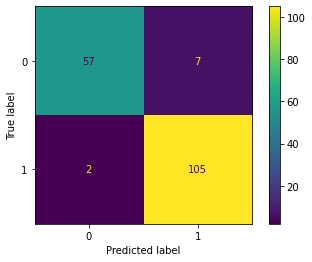

In [3]:
# code
cancer = datasets.load_breast_cancer()
# 1.1
x = cancer.data
y = cancer.target
x_train, x_test, y_train, y_test = tts(x, y, test_size = 0.3)
clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)
print(y_pred)
svm_ps =round(m.precision_score(y_test, y_pred, average='micro'), 4)
svm_rs =round(m.recall_score(y_test, y_pred, average='micro'), 4)
svm_fs=round(m.f1_score(y_test, y_pred, average='micro'), 4)
svm_ac =round(m.accuracy_score(y_test, y_pred), 4)
print(m.confusion_matrix(y_test, y_pred))
print(m.classification_report(y_test, y_pred))
print('Confusion display: ', ConfusionMatrixDisplay.from_predictions(y_test, y_pred))

In [4]:
# 1.2

# Logistic
classifier = LogisticRegression(random_state= 0)
classifier.fit(x_train, y_train)
y_pred_log = classifier.predict(x_test)
logistic_ac = round(m.accuracy_score(y_test, y_pred_log), 4)
logistic_ps = round(m.precision_score(y_test, y_pred_log,average='micro'), 4)
logistic_rs = round(m.recall_score(y_test,y_pred_log,average='micro'), 4)
logistic_fs =  round(m.f1_score(y_test, y_pred_log,average='micro'), 4)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [5]:
# Decision Tree
decision_tree = tree.DecisionTreeClassifier(random_state=50)
decision_tree.fit(x_train, y_train)
y_pred_tree = decision_tree.predict(x_test)
tree_ac = round(m.accuracy_score(y_test, y_pred_tree), 4)
tree_ps = round(m.precision_score(y_test, y_pred_tree), 4)
tree_rs = round(m.recall_score(y_test,y_pred_tree), 4)
tree_fs = round(m.f1_score(y_test, y_pred_tree), 4)

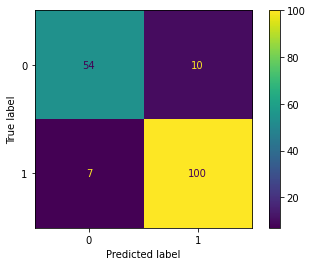

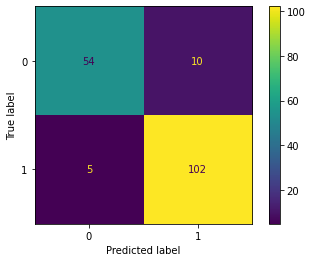

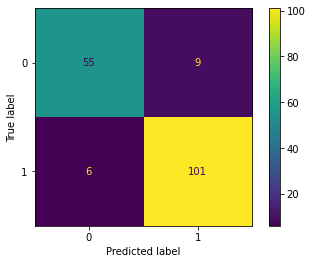

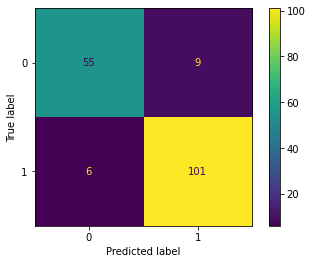

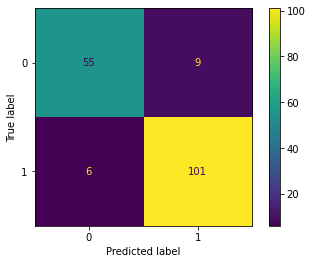

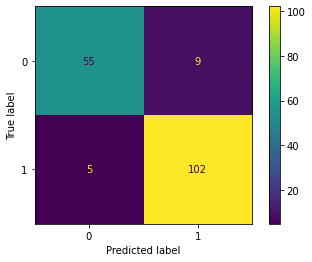

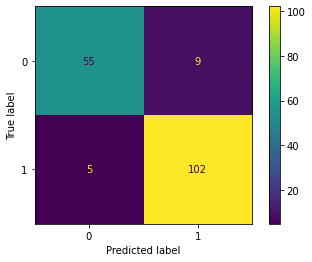

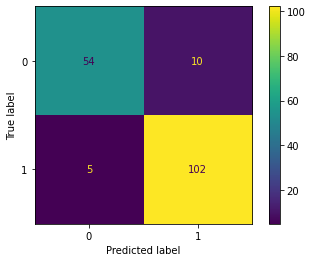

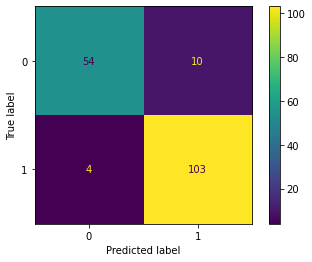

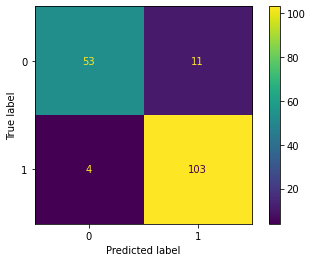

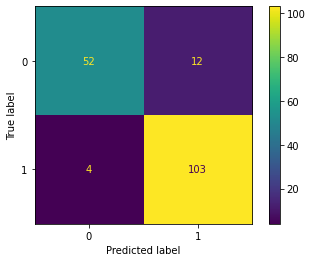

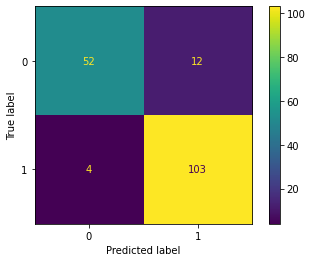

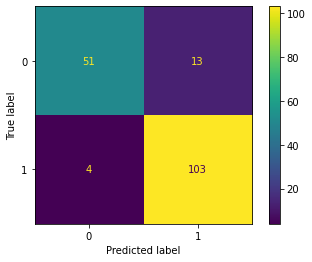

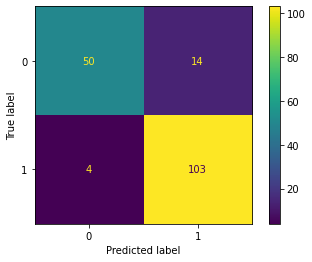

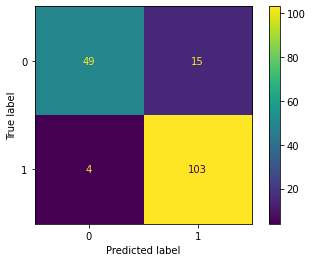

In [6]:

# knn
k_range = range(1, 30, 2)
KNN_ac = []
KNN_ps = []
KNN_rs = []
KNN_fs = []
for k in k_range:
  KNN = KNeighborsClassifier(n_neighbors=k)
  KNN.fit(x_train, y_train)
  y_pred_knn = KNN.predict(x_test)
  KNN_ac.append(round(m.accuracy_score(y_test, y_pred_knn), 4))
  KNN_ps.append(round(m.precision_score(y_test, y_pred_knn), 4))
  KNN_rs.append(round(m.recall_score(y_test, y_pred_knn), 4))
  KNN_fs.append(round(m.f1_score(y_test, y_pred_knn), 4))
  m.ConfusionMatrixDisplay.from_predictions(y_test, y_pred_knn)
     

In [7]:
d_svm = {'Accuracy': svm_ac, 'Precision': svm_ps, 'Recall': svm_rs, 'F1': svm_fs}
d_KNN = {'Accuracy':max(KNN_ac), 'Precision':max(KNN_ps), 'Recall':max(KNN_rs), 'F1': max(KNN_fs)}
d_Logictis =  {'Accuracy': logistic_ac, 'Precision': logistic_ps, 'Recall': logistic_rs, 'F1': logistic_fs}
d_tree = {'Accuracy': tree_ac, 'Precision': tree_ps, 'Recall': tree_rs, 'F1': tree_fs}
pd.DataFrame({'KNN' : pd.Series(d_KNN), 'Logictis Regression':pd.Series(d_Logictis), 'Decision Tree': pd.Series(d_tree)})

,KNN,Logictis Regression,Decision Tree
Accuracy,0.9181,0.9357,0.9123
Precision,0.9189,0.9357,0.9259
Recall,0.9626,0.9357,0.9346
F1,0.9364,0.9357,0.9302


#Task 2. 

*   1.1.	Perform SVM algorithm to **Iris dataset** using **linear kernel**.
*   1.2.	Compare the obtained results in 1.1 with SVM using other kernels (**Polynomial Kernel, Gaussian Kernel, Sigmoid Kernel, Radial Basis Function Kernel**). Some metrics could be used: accuracy, precision, recall, f1 measures





[1 1 0 1 0 0 1 1 1 1 1 1 0 1 0 1 0 1 0 0 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 0 0
 1 0 1 0 1 0 0 1 0 1 0 0 1 1 1 0 0 1 1 0 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 0 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 1
 0 1 0 0 1 0 0 0 1 0 1 1 1 0 0 1 1 0 1 1 1 1 0 1 1 1 1 1 1 1 0 1 0 0 0 1 0
 0 1 1 1 1 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 0 1]
[[16  0  0]
 [ 0 17  1]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        16
           1       1.00      0.94      0.97        18
           2       0.92      1.00      0.96        11

    accuracy                           0.98        45
   macro avg       0.97      0.98      0.98        45
weighted avg       0.98      0.98      0.98        45

Confusion display:  <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay object at 0x7fd1a98f1b50>


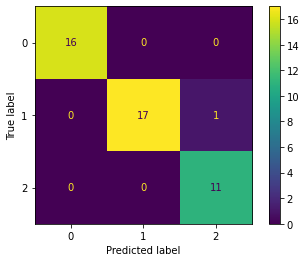

In [8]:
# code
# poly có thêm degree (3  4 5)
data4 = datasets.load_iris()
x_iris = data4.data
y_iris=data4.target
x_train_iris, x_test_iris, y_train_iris, y_test_iris = tts(x_iris, y_iris, test_size = 0.3)
# 1.1
# linear
clf = svm.SVC(kernel='linear')
clf.fit(x_train_iris, y_train_iris)
y_pred_linear = clf.predict(x_test_iris)
print(y_pred)
linear_ps =round(m.precision_score(y_test_iris, y_pred_linear, average='micro'), 4)
linear_rs =round(m.recall_score(y_test_iris, y_pred_linear, average='micro'), 4)
linear_fs=round(m.f1_score(y_test_iris, y_pred_linear, average='micro'), 4)
linear_ac =round(m.accuracy_score(y_test_iris, y_pred_linear), 4)
print(m.confusion_matrix(y_test_iris, y_pred_linear))
print(m.classification_report(y_test_iris, y_pred_linear))
print('Confusion display: ', ConfusionMatrixDisplay.from_predictions(y_test_iris, y_pred_linear))

In [9]:
# 1.2
# poly
clf = svm.SVC(kernel='poly', degree=3)
clf.fit(x_train_iris, y_train_iris)
y_pred_poly = clf.predict(x_test_iris)
poly_ps =round(m.precision_score(y_test_iris, y_pred_poly, average='micro'), 4)
poly_rs =round(m.recall_score(y_test_iris, y_pred_poly, average='micro'), 4)
poly_fs=round(m.f1_score(y_test_iris, y_pred_poly, average='micro'), 4)
poly_ac =round(m.accuracy_score(y_test_iris, y_pred_poly), 4)

In [10]:
#  Sigmoid
clf = svm.SVC(kernel='sigmoid')
clf.fit(x_train_iris, y_train_iris)
y_pred_sigmoid = clf.predict(x_test_iris)
sigmoid_ps =round(m.precision_score(y_test_iris, y_pred_sigmoid, average='micro'), 4)
sigmoid_rs =round(m.recall_score(y_test_iris, y_pred_sigmoid, average='micro'), 4)
sigmoid_fs=round(m.f1_score(y_test_iris, y_pred_sigmoid, average='micro'), 4)
sigmoid_ac =round(m.accuracy_score(y_test_iris, y_pred_sigmoid), 4)

In [11]:
#  RBF
clf = svm.SVC(kernel='rbf')
clf.fit(x_train_iris, y_train_iris)
y_pred_rbf = clf.predict(x_test_iris)
rbf_ps =round(m.precision_score(y_test_iris, y_pred_rbf, average='micro'), 4)
rbf_rs =round(m.recall_score(y_test_iris, y_pred_rbf, average='micro'), 4)
rbf_fs=round(m.f1_score(y_test_iris, y_pred_rbf, average='micro'), 4)
rbf_ac =round(m.accuracy_score(y_test_iris, y_pred_rbf), 4)

In [12]:
d_linear = {'Accuracy': linear_ac, 'Precision': linear_ps, 'Recall': linear_rs, 'F1': linear_fs}
d_poly = {'Accuracy':poly_ac, 'Precision':poly_ps, 'Recall':poly_rs, 'F1': poly_fs}
d_sigmoid =  {'Accuracy': sigmoid_ac, 'Precision': sigmoid_ps, 'Recall': sigmoid_rs, 'F1': sigmoid_fs}
d_rbf = {'Accuracy': rbf_ac, 'Precision': rbf_ps, 'Recall': rbf_rs, 'F1': rbf_fs}
pd.DataFrame({'Linear' : pd.Series(d_linear), 'Poly':pd.Series(d_poly), 'Sigmoid': pd.Series(d_sigmoid), 'RBF': pd.Series(d_rbf)})

,Linear,Poly,Sigmoid,RBF
Accuracy,0.9778,0.9778,0.2444,0.9778
Precision,0.9778,0.9778,0.2444,0.9778
Recall,0.9778,0.9778,0.2444,0.9778
F1,0.9778,0.9778,0.2444,0.9778


#Task 3. 
Compare the performance of selected classification algorithms (Decision Tree, kNN, Logistic Regression) and SVM (using different kernels) with mnist dataset based on accuracy, precision, recall, f1 measures.


In [13]:
mnist = datasets.load_digits()
x = mnist.data
y = mnist.target
x_train_mnist , x_test_mnist , y_train_mnist , y_test_mnist  = tts(x, y, test_size = 0.3)
classifier.fit(x_train_mnist, y_train_mnist)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(random_state=0)

In [14]:
# Decision tree
decision_tree = tree.DecisionTreeClassifier(random_state=50)
decision_tree.fit(x_train_mnist, y_train_mnist)
y_pred_tree = decision_tree.predict(x_test_mnist)
tree_ac = round(m.accuracy_score(y_test_mnist, y_pred_tree), 4)
tree_ps = round(m.precision_score(y_test_mnist, y_pred_tree, average = 'micro'), 4)
tree_rs = round(m.recall_score(y_test_mnist,y_pred_tree, average = 'micro'), 4)
tree_fs = round(m.f1_score(y_test_mnist, y_pred_tree, average = 'micro'), 4)

In [15]:
# knn
k_range = range(1, 30, 2)
KNN_ac = []
KNN_ps = []
KNN_rs = []
KNN_fs = []
for k in k_range:
  KNN = KNeighborsClassifier(n_neighbors=k)
  KNN.fit(x_train_mnist, y_train_mnist)
  y_pred_knn = KNN.predict(x_test_mnist)
  KNN_ac.append(round(m.accuracy_score(y_test_mnist, y_pred_knn), 4))
  KNN_ps.append(round(m.precision_score(y_test_mnist, y_pred_knn, average = 'micro'), 4))
  KNN_rs.append(round(m.recall_score(y_test_mnist, y_pred_knn, average = 'micro'), 4))
  KNN_fs.append(round(m.f1_score(y_test_mnist, y_pred_knn, average = 'micro'), 4))

In [16]:
# Logistic
classifier = LogisticRegression(random_state= 0)
classifier.fit(x_train_mnist, y_train_mnist)
y_pred_log = classifier.predict(x_test_mnist)
logistic_ac = round(m.accuracy_score(y_test_mnist, y_pred_log), 4)
logistic_ps = round(m.precision_score(y_test_mnist, y_pred_log,average='micro'), 4)
logistic_rs = round(m.recall_score(y_test_mnist,y_pred_log,average='micro'), 4)
logistic_fs =  round(m.f1_score(y_test_mnist, y_pred_log,average='micro'), 4)

/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [17]:
# linear
clf = svm.SVC(kernel='linear')
clf.fit(x_train_mnist, y_train_mnist)
y_pred_linear = clf.predict(x_test_mnist)
linear_ps =round(m.precision_score(y_test_mnist, y_pred_linear, average='micro'), 4)
linear_rs =round(m.recall_score(y_test_mnist, y_pred_linear, average='micro'), 4)
linear_fs=round(m.f1_score(y_test_mnist, y_pred_linear, average='micro'), 4)
linear_ac =round(m.accuracy_score(y_test_mnist, y_pred_linear), 4)

In [18]:
# poly
clf = svm.SVC(kernel='poly', degree=3)
clf.fit(x_train_mnist, y_train_mnist)
y_pred_poly = clf.predict(x_test_mnist)
poly_ps =round(m.precision_score(y_test_mnist, y_pred_poly, average='micro'), 4)
poly_rs =round(m.recall_score(y_test_mnist, y_pred_poly, average='micro'), 4)
poly_fs=round(m.f1_score(y_test_mnist, y_pred_poly, average='micro'), 4)
poly_ac =round(m.accuracy_score(y_test_mnist, y_pred_poly), 4)

In [19]:
#  Sigmoid
clf = svm.SVC(kernel='sigmoid')
clf.fit(x_train_mnist, y_train_mnist)
y_pred_sigmoid = clf.predict(x_test_mnist)
sigmoid_ps =round(m.precision_score(y_test_mnist, y_pred_sigmoid, average='micro'), 4)
sigmoid_rs =round(m.recall_score(y_test_mnist, y_pred_sigmoid, average='micro'), 4)
sigmoid_fs=round(m.f1_score(y_test_mnist, y_pred_sigmoid, average='micro'), 4)
sigmoid_ac =round(m.accuracy_score(y_test_mnist, y_pred_sigmoid), 4)

In [20]:
#  RBF
clf = svm.SVC(kernel='rbf')
clf.fit(x_train_mnist, y_train_mnist)
y_pred_rbf = clf.predict(x_test_mnist)
rbf_ps =round(m.precision_score(y_test_mnist, y_pred_rbf, average='micro'), 4)
rbf_rs =round(m.recall_score(y_test_mnist, y_pred_rbf, average='micro'), 4)
rbf_fs=round(m.f1_score(y_test_mnist, y_pred_rbf, average='micro'), 4)
rbf_ac =round(m.accuracy_score(y_test_mnist, y_pred_rbf), 4)

In [22]:
d_KNN = {'Accuracy':max(KNN_ac), 'Precision':max(KNN_ps), 'Recall':max(KNN_rs), 'F1': max(KNN_fs)}
d_Logictis =  {'Accuracy': logistic_ac, 'Precision': logistic_ps, 'Recall': logistic_rs, 'F1': logistic_fs}
d_tree = {'Accuracy': tree_ac, 'Precision': tree_ps, 'Recall': tree_rs, 'F1': tree_fs}
d_linear = {'Accuracy': linear_ac, 'Precision': linear_ps, 'Recall': linear_rs, 'F1': linear_fs}
d_poly = {'Accuracy':poly_ac, 'Precision':poly_ps, 'Recall':poly_rs, 'F1': poly_fs}
d_sigmoid =  {'Accuracy': sigmoid_ac, 'Precision': sigmoid_ps, 'Recall': sigmoid_rs, 'F1': sigmoid_fs}
d_rbf = {'Accuracy': rbf_ac, 'Precision': rbf_ps, 'Recall': rbf_rs, 'F1': rbf_fs}
pd.DataFrame({'Linear' : pd.Series(d_linear), 'Poly':pd.Series(d_poly), 'Sigmoid': pd.Series(d_sigmoid), 'RBF': pd.Series(d_rbf),'KNN' : pd.Series(d_KNN), 'Logictis Regression':pd.Series(d_Logictis), 'Decision Tree': pd.Series(d_tree)})


,Linear,Poly,Sigmoid,RBF,KNN,Logictis Regression,Decision Tree
Accuracy,0.9852,0.9907,0.9204,0.9889,0.9852,0.9722,0.837
Precision,0.9852,0.9907,0.9204,0.9889,0.9852,0.9722,0.837
Recall,0.9852,0.9907,0.9204,0.9889,0.9852,0.9722,0.837
F1,0.9852,0.9907,0.9204,0.9889,0.9852,0.9722,0.837


#Task 4. 
Compare the performance of selected classification algorithms (Decision Tree, kNN, Logistic Regression) and SVM (using different kernels) with **credit card dataset** based on accuracy, precision, recall, f1 measures.

*   Give some comments on the obtained results
*   Identify issues with dataset, and propose the solutions to these issues



In [49]:
# code
dataset4 = pd.read_csv('creditcard.csv')
x_train, x_test, y_train, y_test = tts(dataset4.iloc[:, :30], dataset4.iloc[:, 30:], train_size = 0.3, test_size=0.05,shuffle='true')


In [50]:
# Decision tree
decision_tree = tree.DecisionTreeClassifier(random_state=50)
decision_tree.fit(x_train, y_train)
y_pred_tree = decision_tree.predict(x_test)
tree_ac = round(m.accuracy_score(y_test, y_pred_tree), 4)
tree_ps = round(m.precision_score(y_test, y_pred_tree, average = 'micro'), 4)
tree_rs = round(m.recall_score(y_test,y_pred_tree, average = 'micro'), 4)
tree_fs = round(m.f1_score(y_test, y_pred_tree, average = 'micro'), 4)

In [51]:
# knn
k_range = range(1, 30, 2)
KNN_ac = []
KNN_ps = []
KNN_rs = []
KNN_fs = []
for k in k_range:
  KNN = KNeighborsClassifier(n_neighbors=k)
  KNN.fit(x_train, y_train)
  y_pred_knn = KNN.predict(x_test)
  KNN_ac.append(round(m.accuracy_score(y_test, y_pred_knn), 4))
  KNN_ps.append(round(m.precision_score(y_test, y_pred_knn, average = 'micro'), 4))
  KNN_rs.append(round(m.recall_score(y_test, y_pred_knn, average = 'micro'), 4))
  KNN_fs.append(round(m.f1_score(y_test, y_pred_knn, average = 'micro'), 4))

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

In [52]:
# Logistic
classifier = LogisticRegression(random_state= 0)
classifier.fit(x_train, y_train)
y_pred_log = classifier.predict(x_test)
logistic_ac = round(m.accuracy_score(y_test, y_pred_log), 4)
logistic_ps = round(m.precision_score(y_test, y_pred_log,average='micro'), 4)
logistic_rs = round(m.recall_score(y_test,y_pred_log,average='micro'), 4)
logistic_fs =  round(m.f1_score(y_test, y_pred_log,average='micro'), 4)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.9/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [53]:
# linear
clf = svm.SVC(kernel='linear')
clf.fit(x_train, y_train)
y_pred_linear = clf.predict(x_test)
linear_ps =round(m.precision_score(y_test, y_pred_linear, average='micro'), 4)
linear_rs =round(m.recall_score(y_test, y_pred_linear, average='micro'), 4)
linear_fs=round(m.f1_score(y_test, y_pred_linear, average='micro'), 4)
linear_ac =round(m.accuracy_score(y_test, y_pred_linear), 4)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [54]:
# poly
clf = svm.SVC(kernel='poly', degree=3)
clf.fit(x_train, y_train)
y_pred_poly = clf.predict(x_test)
poly_ps =round(m.precision_score(y_test, y_pred_poly, average='micro'), 4)
poly_rs =round(m.recall_score(y_test, y_pred_poly, average='micro'), 4)
poly_fs=round(m.f1_score(y_test, y_pred_poly, average='micro'), 4)
poly_ac =round(m.accuracy_score(y_test, y_pred_poly), 4)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [55]:
#  Sigmoid
clf = svm.SVC(kernel='sigmoid')
clf.fit(x_train, y_train)
y_pred_sigmoid = clf.predict(x_test)
sigmoid_ps =round(m.precision_score(y_test, y_pred_sigmoid, average='micro'), 4)
sigmoid_rs =round(m.recall_score(y_test, y_pred_sigmoid, average='micro'), 4)
sigmoid_fs=round(m.f1_score(y_test, y_pred_sigmoid, average='micro'), 4)
sigmoid_ac =round(m.accuracy_score(y_test, y_pred_sigmoid), 4)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [56]:
#  RBF
clf = svm.SVC(kernel='rbf')
clf.fit(x_train, y_train)
y_pred_rbf = clf.predict(x_test)
rbf_ps =round(m.precision_score(y_test, y_pred_rbf, average='micro'), 4)
rbf_rs =round(m.recall_score(y_test, y_pred_rbf, average='micro'), 4)
rbf_fs=round(m.f1_score(y_test, y_pred_rbf, average='micro'), 4)
rbf_ac =round(m.accuracy_score(y_test, y_pred_rbf), 4)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [57]:
d_KNN = {'Accuracy':max(KNN_ac), 'Precision':max(KNN_ps), 'Recall':max(KNN_rs), 'F1': max(KNN_fs)}
d_Logictis =  {'Accuracy': logistic_ac, 'Precision': logistic_ps, 'Recall': logistic_rs, 'F1': logistic_fs}
d_tree = {'Accuracy': tree_ac, 'Precision': tree_ps, 'Recall': tree_rs, 'F1': tree_fs}
d_linear = {'Accuracy': linear_ac, 'Precision': linear_ps, 'Recall': linear_rs, 'F1': linear_fs}
d_poly = {'Accuracy':poly_ac, 'Precision':poly_ps, 'Recall':poly_rs, 'F1': poly_fs}
d_sigmoid =  {'Accuracy': sigmoid_ac, 'Precision': sigmoid_ps, 'Recall': sigmoid_rs, 'F1': sigmoid_fs}
d_rbf = {'Accuracy': rbf_ac, 'Precision': rbf_ps, 'Recall': rbf_rs, 'F1': rbf_fs}
pd.DataFrame({'Linear' : pd.Series(d_linear), 'Poly':pd.Series(d_poly), 'Sigmoid': pd.Series(d_sigmoid), 'RBF': pd.Series(d_rbf),'KNN' : pd.Series(d_KNN), 'Logictis Regression':pd.Series(d_Logictis), 'Decision Tree': pd.Series(d_tree)})


,Linear,Poly,Sigmoid,RBF,KNN,Logictis Regression,Decision Tree
Accuracy,0.9985,0.9978,0.9978,0.9978,0.9979,0.999,0.9989
Precision,0.9985,0.9978,0.9978,0.9978,0.9979,0.999,0.9989
Recall,0.9985,0.9978,0.9978,0.9978,0.9979,0.999,0.9989
F1,0.9985,0.9978,0.9978,0.9978,0.9979,0.999,0.9989


#Finally,
Save a copy in your Github. Remember renaming the notebook.